*  Take an image and detect face using open cv
*  Now detect eyes in face and draw rectangle around eyes using open cv
*  Try to detect smile in face and draw rectangle around lips/smile


##### Detecting the face: - 

In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
face_cascade = cv2.CascadeClassifier((cv2.data.haarcascades+'haarcascade_frontalface_default.xml'))

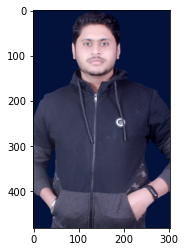

In [2]:
img = cv2.imread(r"C:/Users/Ganpati Kumar Roy/File/Pictures/Personal Data/Photo/Ganpati Roy.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Face Detected Successfully.....!


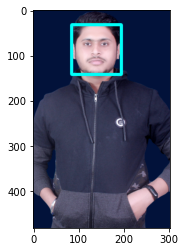

In [3]:
faces = face_cascade.detectMultiScale(img, scaleFactor = 1.20, minNeighbors = 4)
for x, y, w, h in faces:
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 250), 5)
    print("Face Detected Successfully.....!")
    plt.imshow(img)

##### Detecting eyes on the face: -

In [4]:
face_cascade = cv2.CascadeClassifier((cv2.data.haarcascades+'haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier((cv2.data.haarcascades+'haarcascade_eye.xml'))
img = cv2.imread(r"C:/Users/Ganpati Kumar Roy/File/Pictures/Personal Data/Photo/Ganpati Roy.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Try to detect smile in face and draw rectangle around lips/smile

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_smile.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

def detect(gray, frame):
	faces = face_cascade.detectMultiScale(gray, 1.3, 5)
	for (x, y, w, h) in faces:
		cv2.rectangle(frame, (x, y), ((x + w), (y + h)), (255, 0, 0), 2)
		roi_gray = gray[y:y + h, x:x + w]
		roi_color = frame[y:y + h, x:x + w]
		smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)

		for (sx, sy, sw, sh) in smiles:
			cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2)
	return frame

video_capture = cv2.VideoCapture(0)
while video_capture.isOpened():
# Captures video_capture frame by frame
	_, frame = video_capture.read()

	# To capture image in monochrome				
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
	
	# calls the detect() function
	canvas = detect(gray, frame)

	# Displays the result on camera feed					
	cv2.imshow('Video', canvas)

	# The control breaks once q key is pressed					
	if cv2.waitKey(1) & 0xff == ord('q'):			
		break

# Release the capture once all the processing is done.
video_capture.release()								
cv2.destroyAllWindows()